# 혼자 공부하는 머신러닝+딥러닝 : 04-1

In [4]:
import pandas as pd

# read_csv() : csv 파일을 데이터 프레임으로 변환
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

# 'Species' 열에서 고유한 값 출력
print(pd.unique(fish['Species']))

# 'Species'열 : 타깃
# 나머지 5개 열 : 입력 데이터

# 입력 데이터 준비
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(fish_input[:5])

# 타깃 데이터 준비
fish_target = fish['Species'].to_numpy()

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 나눔.
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

# 훈련 세트와 테스트 세트를 표준화 전처리 : 훈련 세트의 통계 값으로 테스트 세트 변환해야 함.
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## k-최근접 이웃 분류기의 확률 예측

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# 최근 접 이웃 개수 k를 3으로 지정.
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

# 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨짐.
# 위에서 본 print(pd.unique(fish['Species']))의 출력값과 순서가 다름.
print(kn.classes_)

import numpy as np

# predict() : 타깃값으로 예측을 출력
# predict_proba() : 사이킷런 분류 모델은 이 함수를 통해 클래스별 확률값 반환. / 출력 순서는 앞서 보았던 classes_ 속성과 동일
# round() : 기본으로 소수점 첫째 자리에서 반올림 함. / decimals 매개변수로 유지할 소수점 아래 자릿수 지정 가능.
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

# 네번째 샘플의 최근접 이웃의 클래스 확인
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

# 다섯 번째 클래스 'Roach' 1개 : 다섯 번째 클래스에 대한 확률 1/3 = 0.3333
# 세 번째 클래스 'Perch' 2개 : 세 번째 클래스에 대한 확률 2/3 = 0.6667

0.8907563025210085
0.85
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀

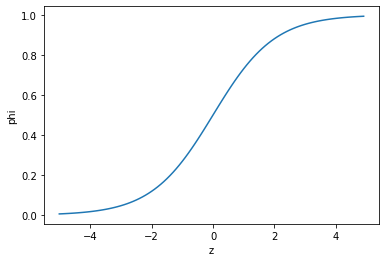

In [7]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

## 로지스틱 회귀로 이진 분류 수행하기

In [9]:
# A와 C 골라내기
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [8]:
# 빙어(Smelt)와 도미(Bream) 행 골라내기
# (train_target == 'Bream') : tain_target 배열에서 'Bream'인 것은 True이고 그 외는 모두 False인 배열 반환
# 도미와 빙어에 대한 비교 결과를 비트 연산자( | )를 사용하여 도미와 빙어에 대한 행만 골라냄
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]


#  LogisticRegression() : 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# 훈련
lr.fit(train_bream_smelt, target_bream_smelt)

# train_bream_smelt에 있는 샘플 5개 예측
print(lr.predict(train_bream_smelt[:5]))

# 샘플의 예측 확률
# 첫번째 열 : 음성 클래스(0)에 대한 확률
# 두번째 열 : 양성 클래스(1)에 대한 확률
# 두번째 샘플만 빙어에 대한 확률이 높으므로 나머지는 모두 도미로 예측
print(lr.predict_proba(train_bream_smelt[:5]))

# 도미(bream)가 음성 클래스, 빙어(smelt)가 양성 클래스
print(lr.classes_)

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


In [10]:
# 로지스틱 회귀가 학습한 계수
print(lr.coef_, lr.intercept_)

# 로지스틱 회귀 모델이 학습한 방정식
# z = -0.404 * (Weighbt) -0.576 * (Lengtb) -0.663 * (Diagonal) - 1.013 * (Heigbt) - 0.732 * (Widthb) - 2.161

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [11]:
# decision_function() : z 값 출력
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

# z값을 시그모이드 함수에 통과시키면 확률 얻을 수 있음.
# expit() : 시그모이드 함수
from scipy.special import expit

print(expit(decisions))

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


## 로지스틱 회귀로 다중 분류 수행하기

In [12]:
# L2 규제 (릿지) : 계수의 제곱 규제
# LogisticRegression()에서 규제를 제어하는 매개변수 = C
# C 는 알파와 반대로 작을수록 규제가 커짐. C의 기본값 = 1

# 규제 완화 : C = 20
# LogisticRegression 클래스로 다중 분류 모델을 훈련하는 코드
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 훈련 세트와 테스트 세트에 대한 점수가 높고 과대적합이나 과소적합으로 치우치지 않음. 

0.9327731092436975
0.925


In [13]:
# 테스트 샘플 5개에 대한 예측
print(lr.predict(test_scaled[:5]))

# 테스트 세트 5개에 대한 예측 확률
proba = lr.predict_proba(test_scaled[:5])
# 소수점 4번째 자리에서 반올림.
# 5개 샘플에 대한 예측이므로 5개의 행 출력
# 7개 생선에 대한 확률 계산했으므로 7개 열 출력
# 이진 분류일 경우 2개의 열만 있었음.
print(np.round(proba, decimals=3))

# 클래스 정보 확인
print(lr.classes_)

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [14]:
# 다중 분류일 경우 선형 방정식
# coef_배열 값 = 5 : 5개의 특성 사용
# 행 7개, intercept_  = 7  : z를 7개 계산한다는 의미
# 다중 분류는 클래스마다 z 값을 하나씩 계산
# 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 됨. 
print(lr.coef_.shape, lr.intercept_.shape)

# 이진 분류에서는 시그모이드 함수를 사용해 z를 0~1 사이 값으로 변환했지만,
# 다중 분류는 소프트맥스 함수 사용하여 7개의 z값을 확률로 변환

# z1 ~ z7값 구하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

# softmax : softmax 함수
from scipy.special import softmax

# axis = 1 로 지정하여 각 행, 즉 각 샘플에 대해 소프트 맥스 계산 / 지정하지 않으면, 배열 전체에 대해 소프트맥스 계산.
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

(7, 5) (7,)
[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
